In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
air_pollutions_df = pd.read_excel('../data/national_state_sector_2002_2024_caps_21feb2025_tons (1).xlsx', sheet_name='State')

In [4]:
air_pollutions_df.head(2)

,State FIPS,State,Pollutant,Sector,emissions2002,emissions2003,emissions2004,emissions2005,emissions2006,emissions2007,...,emissions2015,emissions2016,emissions2017,emissions2018,emissions2019,emissions2020,emissions2021,emissions2022,emissions2023,emissions2024
0,1,AL,Black Carbon,Agriculture - Crops & Livestock Dust,186.911689,192.755284,184.744382,181.600073,176.485625,176.472545,...,165.032132,171.476645,177.730086,182.751299,180.776253,179.027200,179.027234,173.883152,173.883152,173.883152
1,1,AL,Black Carbon,Fuel & Services - Gasoline Terminals,0.007700,0.007700,0.007700,0.007700,0.007700,0.007700,...,0.007700,0.007700,0.007700,0.007700,0.007700,0.007511,0.007082,0.006873,0.006873,0.006873


In [5]:
air_pollutions_df[['Sector', 'Category', 'Subcategory']] = (
    air_pollutions_df['Sector']
    .str
    .split('-', n=2, expand=True)
)

In [6]:
air_pollutions_df.head()

,State FIPS,State,Pollutant,Sector,emissions2002,emissions2003,emissions2004,emissions2005,emissions2006,emissions2007,...,emissions2017,emissions2018,emissions2019,emissions2020,emissions2021,emissions2022,emissions2023,emissions2024,Category,Subcategory
0,1,AL,Black Carbon,Agriculture,186.911689,192.755284,184.744382,181.600073,176.485625,176.472545,...,177.730086,182.751299,180.776253,179.027200,179.027234,173.883152,173.883152,173.883152,Crops & Livestock Dust,None
1,1,AL,Black Carbon,Fuel & Services,0.007700,0.007700,0.007700,0.007700,0.007700,0.007700,...,0.007700,0.007700,0.007700,0.007511,0.007082,0.006873,0.006873,0.006873,Gasoline Terminals,None
2,1,AL,Black Carbon,Fuel & Services,38.416900,38.416900,38.416900,38.416900,38.093000,38.093000,...,39.815800,39.815800,39.815800,92.172021,92.088614,92.088614,92.088614,92.088614,Commercial Cooking,None
3,1,AL,Black Carbon,Dust,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Construction Dust,None
4,1,AL,Black Carbon,Dust,49.204652,45.977755,50.477153,53.880845,50.906936,67.234186,...,64.094491,57.509753,65.910076,53.003271,42.214994,49.981178,49.981178,49.981178,Paved Road Dust,None


In [79]:
air_pollutions_df['Sector'] = air_pollutions_df['Sector'].replace({'Other Non Industrial' : 'Other Non-Industrial'})
air_pollutions_df['Pollutant'] = air_pollutions_df['Pollutant'].replace('PM25-PRI', 'PM2.5')
air_pollutions_df['Pollutant'] = air_pollutions_df['Pollutant'].replace('PM10-PRI', 'PM10')

In [80]:
air_pollutions_df['Sector'].unique()

array(['Agriculture ', 'Fuel & Services ', 'Dust ', 'Fires ',
       'Fuel Comb ', 'Industrial Processes ', 'Other Non-Industrial',
       'Transportation ', 'Solvent ', 'Waste Disposal'], dtype=object)

In [81]:
air_pollutions_df['State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR', 'VI', 'TB'],
      dtype=object)

In [82]:
states_df = pd.read_csv('../data/states_boundries_updated.csv')
states_df.head()
df_states= states_df.rename(columns={'STUSPS' : 'State'})
#df_states.head()

In [83]:
merged_df = pd.merge(air_pollutions_df, df_states, on='State', how='inner' )
merged_df.shape

(24379, 33)

In [84]:
airpollution_df = merged_df[['State', 'NAME', 'Pollutant', 'Sector','Category', 'Subcategory', 'emissions2002', 'emissions2003', 'emissions2004', 'emissions2005','emissions2006','emissions2007',
          'emissions2008', 'emissions2009','emissions2010','emissions2011','emissions2012','emissions2013','emissions2014','emissions2015','emissions2016',
          'emissions2017','emissions2018','emissions2019','emissions2020','emissions2021','emissions2022', 'emissions2023', 'emissions2024','INTPTLAT','INTPTLON']]

In [85]:
airpollution_df.head()

,State,NAME,Pollutant,Sector,Category,Subcategory,emissions2002,emissions2003,emissions2004,emissions2005,...,emissions2017,emissions2018,emissions2019,emissions2020,emissions2021,emissions2022,emissions2023,emissions2024,INTPTLAT,INTPTLON
0,AL,Alabama,Black Carbon,Agriculture,Crops & Livestock Dust,None,186.911689,192.755284,184.744382,181.600073,...,177.730086,182.751299,180.776253,179.027200,179.027234,173.883152,173.883152,173.883152,32.739579,-86.843447
1,AL,Alabama,Black Carbon,Fuel & Services,Gasoline Terminals,None,0.007700,0.007700,0.007700,0.007700,...,0.007700,0.007700,0.007700,0.007511,0.007082,0.006873,0.006873,0.006873,32.739579,-86.843447
2,AL,Alabama,Black Carbon,Fuel & Services,Commercial Cooking,None,38.416900,38.416900,38.416900,38.416900,...,39.815800,39.815800,39.815800,92.172021,92.088614,92.088614,92.088614,92.088614,32.739579,-86.843447
3,AL,Alabama,Black Carbon,Dust,Construction Dust,None,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.739579,-86.843447
4,AL,Alabama,Black Carbon,Dust,Paved Road Dust,None,49.204652,45.977755,50.477153,53.880845,...,64.094491,57.509753,65.910076,53.003271,42.214994,49.981178,49.981178,49.981178,32.739579,-86.843447


In [86]:
#df.columns = df.columns.str.replace('emissions', '')
airpollution_df.columns = airpollution_df.columns.str.replace('emissions', '')

In [87]:
new_df = airpollution_df.copy()
new_df.head()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24379 entries, 0 to 24378
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        24379 non-null  object 
 1   NAME         24379 non-null  object 
 2   Pollutant    24379 non-null  object 
 3   Sector       24379 non-null  object 
 4   Category     23425 non-null  object 
 5   Subcategory  12232 non-null  object 
 6   2002         24375 non-null  float64
 7   2003         24375 non-null  float64
 8   2004         24375 non-null  float64
 9   2005         24375 non-null  float64
 10  2006         24375 non-null  float64
 11  2007         24375 non-null  float64
 12  2008         24375 non-null  float64
 13  2009         24375 non-null  float64
 14  2010         24375 non-null  float64
 15  2011         24375 non-null  float64
 16  2012         24375 non-null  float64
 17  2013         24375 non-null  float64
 18  2014         24375 non-null  float64
 19  2015

In [88]:
df_melted_new =(
    new_df
    .melt(id_vars = ['State','NAME','Pollutant','Sector','Category','Subcategory','INTPTLAT', 'INTPTLON'], var_name='Year', value_name='Value')
)

In [89]:
pollution_df= df_melted_new.copy()
pollution_df['Value'] = pollution_df['Value'].fillna(0)
pollution_df.head()
pollution_df['Sector'] = pollution_df['Sector'].str.strip()
pollution_df['Total_emissions_mlns'] = pollution_df['Value']/1000000
pollution_df.head()
print(pollution_df.info())
pollution_df.to_csv(r'C:\Users\jinor\OneDrive\Documents\NSS\python\Air-Pollution-Analysis\data\pollution_dataset.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560717 entries, 0 to 560716
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   State                 560717 non-null  object 
 1   NAME                  560717 non-null  object 
 2   Pollutant             560717 non-null  object 
 3   Sector                560717 non-null  object 
 4   Category              538775 non-null  object 
 5   Subcategory           281336 non-null  object 
 6   INTPTLAT              560717 non-null  float64
 7   INTPTLON              560717 non-null  float64
 8   Year                  560717 non-null  object 
 9   Value                 560717 non-null  float64
 10  Total_emissions_mlns  560717 non-null  float64
dtypes: float64(4), object(7)
memory usage: 47.1+ MB
None


In [132]:
# Group by sector
sector_totals = (
    pollution_df
    .groupby('Sector')['Total_emissions_mlns']
    .sum()
    .reset_index(name='Total Emissions')
    .sort_values(by='Total Emissions', ascending=True)
)

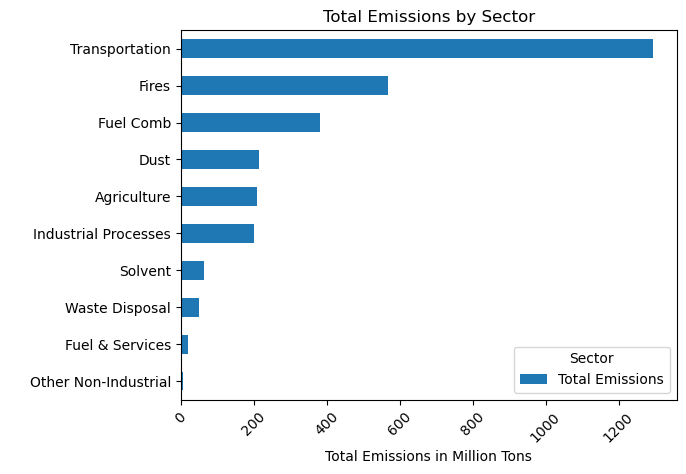

In [189]:
# Plot bar chart
sector_totals.plot(kind='barh', x='Sector', y='Total Emissions')
plt.xlabel('Total Emissions in Million Tons')
plt.ylabel(' ')
plt.title('Total Emissions by Sector')
plt.xticks(rotation=45)
plt.legend(title='Sector')
plt.show()

In [142]:
# Yearly emissions by sector
yearly_emissions = (
    pollution_df
    .groupby(['Year', 'Sector'])['Total_emissions_mlns']
    .sum()
    .reset_index()
)

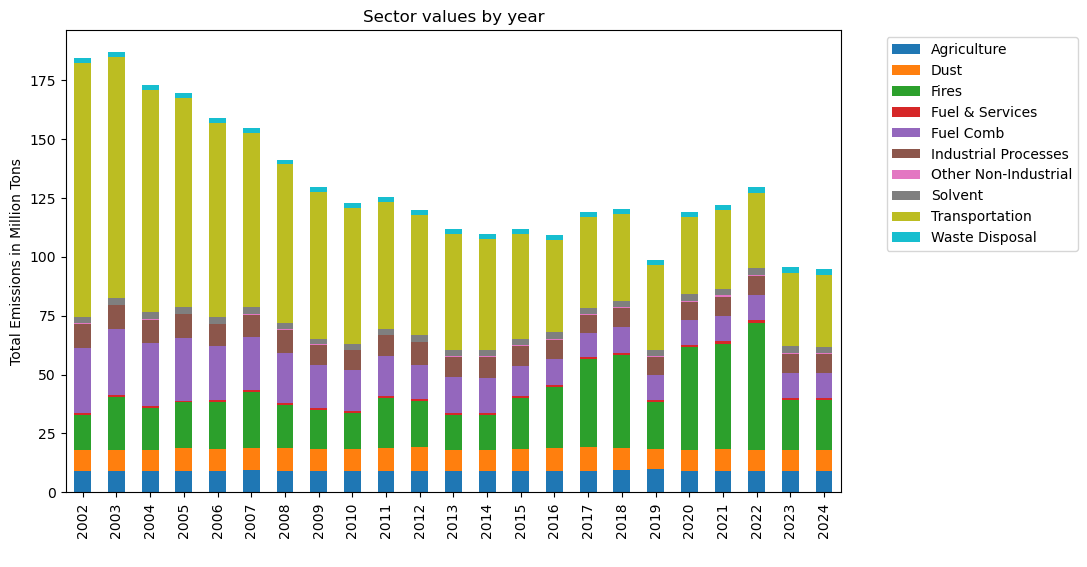

In [144]:
yearly_emissions_pivot = (yearly_emissions
                          .pivot(index='Year', columns='Sector', values='Total_emissions_mlns')
                         )
yearly_emissions_pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sector values by year')
plt.xlabel(' ')
plt.ylabel('Total Emissions in Million Tons')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


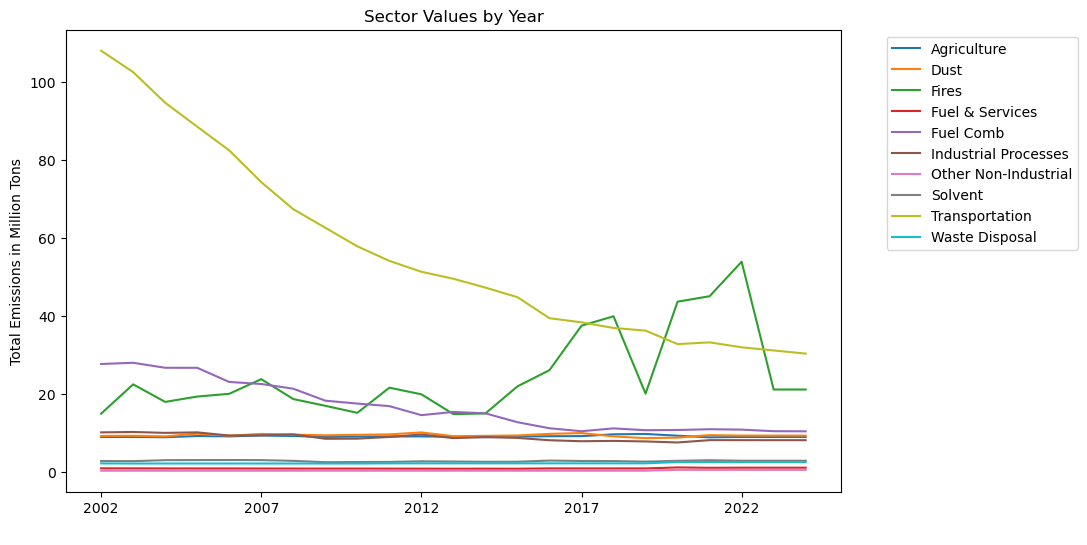

In [155]:
yearly_emissions_pivot.plot(figsize=(10,6))

plt.title('Sector Values by Year')
plt.ylabel('Total Emissions in Million Tons')
plt.xlabel(' ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [95]:
# Filtering only the rows where sevtor is "Transportation"
transportation_df = pollution_df[pollution_df['Sector'] == 'Transportation']
transportation_df.head()

,State,NAME,Pollutant,Sector,Category,Subcategory,INTPTLAT,INTPTLON,Year,Value,Total_emissions_mlns
40,AL,Alabama,Black Carbon,Transportation,Aircraft,None,32.739579,-86.843447,2002,114.34297,0.000114
41,AL,Alabama,Black Carbon,Transportation,Marine Transport,None,32.739579,-86.843447,2002,116.46030,0.000116
42,AL,Alabama,Black Carbon,Transportation,Rail Transport,None,32.739579,-86.843447,2002,436.07000,0.000436
43,AL,Alabama,Black Carbon,Transportation,Off Road Equipment,Diesel Machinery,32.739579,-86.843447,2002,2114.34282,0.002114
44,AL,Alabama,Black Carbon,Transportation,Off Road Equipment,Gasoline Machinery,32.739579,-86.843447,2002,114.83016,0.000115


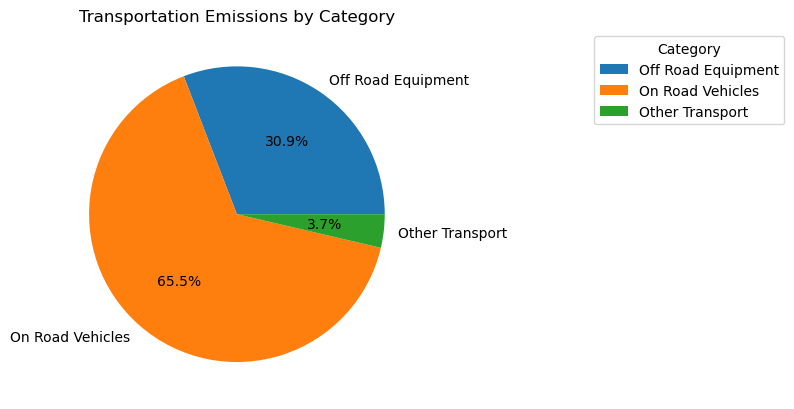

In [154]:
transport_df_modified = transportation_df.copy()

transport_df_modified['Category'] = (
    transport_df_modified['Category']
    .astype(str)        
    .str.strip()        
       
)

#Replace categories before grouping
transport_df_modified['Category'] = transport_df_modified['Category'].replace({
    'Marine Transport': 'Other Transport',
    'Aircraft': 'Other Transport',
    'Rail Transport': 'Other Transport'
})

# Group after replacing
transportation_category_df = (
    transport_df_modified
    .groupby('Category')['Total_emissions_mlns']
    .sum()
    .reset_index(name='trans_cat_emission')
)
transport_df_modified
# Plot pie chart
transportation_category_df.set_index('Category').plot.pie(
    y='trans_cat_emission',
    autopct='%1.1f%%'
)

plt.legend(loc='upper right', bbox_to_anchor=(2, 1.0), title='Category')
plt.ylabel('')
plt.title('Transportation Emissions by Category')
plt.show()

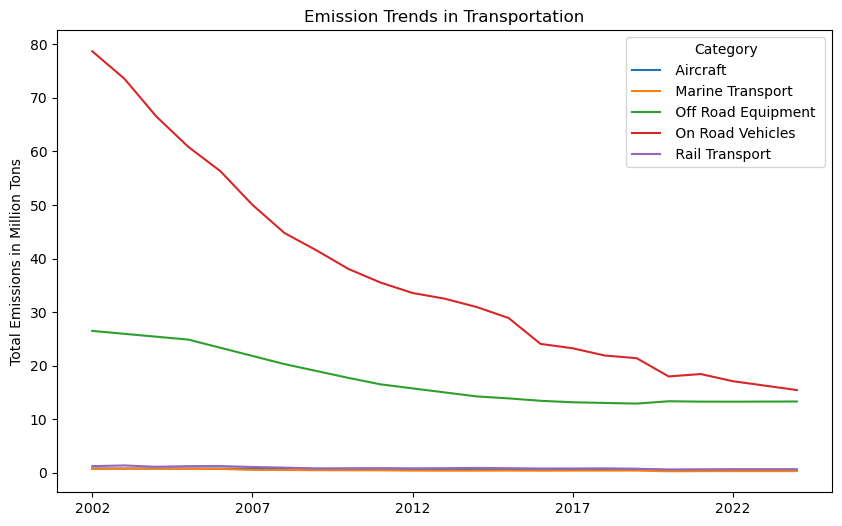

In [216]:
# Yearly emissions trend by category
yearly_transportation_df = (
    transportation_df
    .groupby(['Year', 'Category'])['Total_emissions_mlns']
    .sum()
    .reset_index(name='total_emission')
)
yearly_transportation_pivot = yearly_transportation_df.pivot(index='Year', columns='Category', values='total_emission')
yearly_transportation_pivot.plot(figsize=(10,6))
plt.ylabel('Total Emissions in Million Tons')

plt.xlabel('')
plt.title('Emission Trends in Transportation')
plt.show()


In [98]:
# Filtering fire sector emissions from the main Air pollution dataset
fire_df= pollution_df[pollution_df['Sector']== 'Fires']
fire_df.head()

,State,NAME,Pollutant,Sector,Category,Subcategory,INTPTLAT,INTPTLON,Year,Value,Total_emissions_mlns
6,AL,Alabama,Black Carbon,Fires,Agricultural Field Burning,None,32.739579,-86.843447,2002,31.231095,0.000031
7,AL,Alabama,Black Carbon,Fires,Prescribed Fires,None,32.739579,-86.843447,2002,1672.320000,0.001672
8,AL,Alabama,Black Carbon,Fires,Wildfires,None,32.739579,-86.843447,2002,84.727000,0.000085
57,AL,Alabama,CO,Fires,Agricultural Field Burning,None,32.739579,-86.843447,2002,2571.941864,0.002572
58,AL,Alabama,CO,Fires,Prescribed Fires,None,32.739579,-86.843447,2002,571996.610000,0.571997


In [160]:
# Total emissions by fire category
fire_category_df = (
    fire_df
    .groupby('Category')['Total_emissions_mlns']
    .sum()
    .reset_index(name='Total Emissions')    
    .sort_values(by='Total Emissions', ascending=False)
)
fire_category_df

,Category,Total Emissions
2,Wildfires,285.341798
1,Prescribed Fires,264.984524
0,Agricultural Field Burning,19.146244


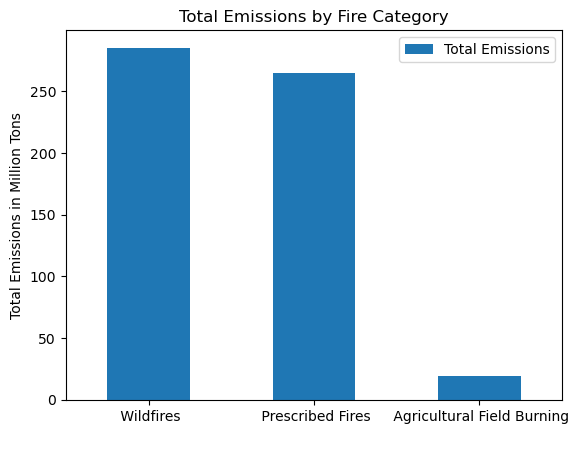

In [162]:
# Bar chart shows overall fire related pollution
fire_category_df.plot(kind='bar', x='Category', y='Total Emissions', rot=0)
plt.xlabel(' ')
plt.ylabel('Total Emissions in Million Tons')
plt.title('Total Emissions by Fire Category')
plt.show()

Text(0.5, 1.0, 'Emission Trends in Fires')

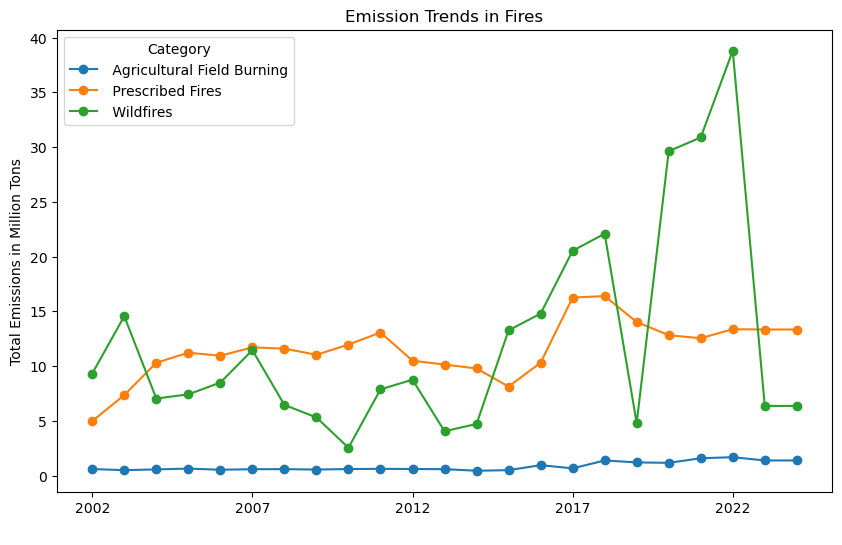

In [190]:
# Yearly emissions trend by Fire category
yearly_fire_df = (
    fire_df
    .groupby(['Year', 'Category'])['Total_emissions_mlns']
    .sum()
    .reset_index(name='total_emission')
)
yearly_fire_pivot = yearly_fire_df.pivot(index='Year', columns='Category', values='total_emission')
yearly_fire_pivot.plot(figsize=(10,6), marker='o')
plt.ylabel('Total Emissions in Million Tons')
plt.xlabel(' ')
plt.title('Emission Trends in Fires')

In [102]:
# Top states by fire emissions
fire_state_summary = (
    fire_df
    .groupby('NAME')['Total_emissions_mlns']
    .sum()
    .reset_index(name='fire_total_emissions')
    .sort_values(by='fire_total_emissions', ascending=False)
)
fire_state_summary.head(6).reset_index(drop=True)

,NAME,fire_total_emissions
0,California,62.772343
1,Alaska,61.488403
2,Oregon,54.339796
3,Idaho,27.940958
4,Florida,27.763980
5,Texas,24.513934


In [103]:
# Filtering fuel sector emissions from the main Air pollution dataset
fuel_df= pollution_df[pollution_df['Sector']== 'Fuel Comb']
fuel_df.head()

,State,NAME,Pollutant,Sector,Category,Subcategory,INTPTLAT,INTPTLON,Year,Value,Total_emissions_mlns
9,AL,Alabama,Black Carbon,Fuel Comb,Comm/Institutional,Biomass,32.739579,-86.843447,2002,0.643667,6.436670e-07
10,AL,Alabama,Black Carbon,Fuel Comb,Comm/Institutional,Coal,32.739579,-86.843447,2002,0.425113,4.251130e-07
11,AL,Alabama,Black Carbon,Fuel Comb,Comm/Institutional,Natural Gas,32.739579,-86.843447,2002,0.835048,8.350484e-07
12,AL,Alabama,Black Carbon,Fuel Comb,Comm/Institutional,Oil,32.739579,-86.843447,2002,18.680693,1.868069e-05
13,AL,Alabama,Black Carbon,Fuel Comb,Comm/Institutional,Other,32.739579,-86.843447,2002,0.139218,1.392184e-07


In [164]:
# Total emissions by fuel category
fuel_category_df = (
    fuel_df
    .groupby('Category')['Total_emissions_mlns']
    .sum()
    .reset_index(name='Total Emissions')    
    .sort_values(by='Total Emissions', ascending=False)
)
fuel_category_df

,Category,Total Emissions
1,Electric Generation,181.957611
3,Residential,111.371812
2,Industrial Boilers,73.914795
0,Comm/Institutional,14.507129


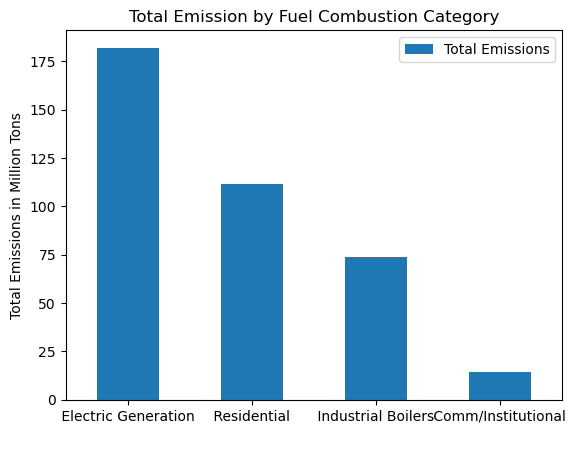

In [199]:
fuel_category_df.plot(kind='bar', x='Category', y='Total Emissions', rot=0)
plt.title('Total Emission by Fuel Combustion Category')
plt.xlabel(' ')
plt.ylabel('Total Emissions in Million Tons')
plt.show()

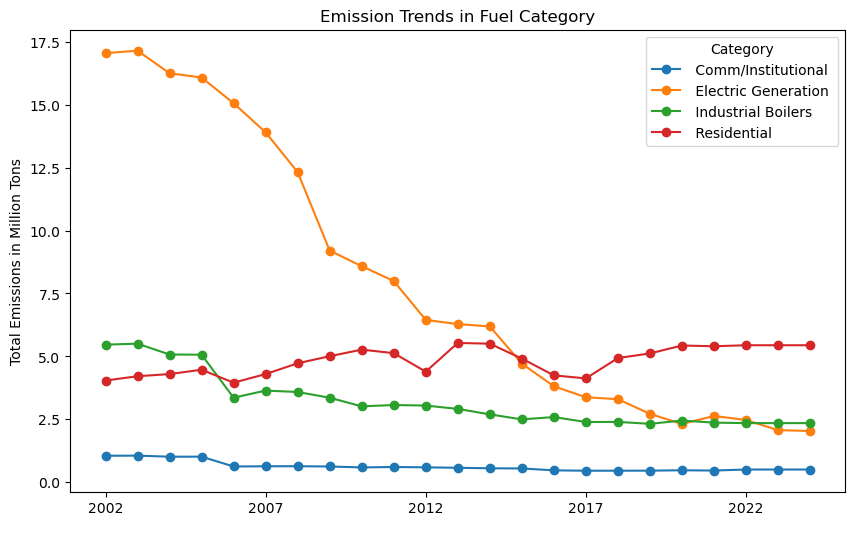

In [200]:
# Yearly emissions trend by fuel category
yearly_fuel_df = (
    fuel_df
    .groupby(['Year', 'Category'])['Total_emissions_mlns']
    .sum()
    .reset_index(name='total_emission')
)
yearly_fuel_pivot = yearly_fuel_df.pivot(index='Year', columns='Category', values='total_emission')
yearly_fuel_pivot.plot(figsize=(10,6), marker='o')
plt.ylabel('Total Emissions in Million Tons')
plt.xlabel(' ')
plt.title('Emission Trends in Fuel Category')
plt.show()

In [168]:
fuel_subcategory_df = (
    fuel_df
    .groupby('Subcategory')['Total_emissions_mlns']
    .sum()
    .reset_index(name='Total Emissions')    
    .sort_values(by='Total Emissions', ascending=False)
)
fuel_subcategory_df

,Subcategory,Total Emissions
1,Coal,181.875700
5,Wood,97.290306
2,Natural Gas,52.195949
0,Biomass,19.783341
3,Oil,19.465254
4,Other,11.140797


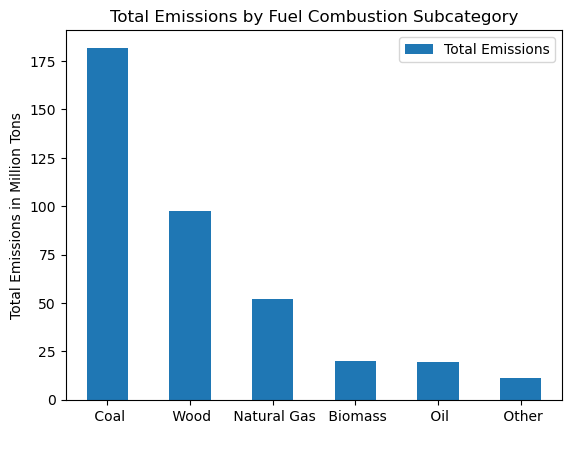

In [169]:
fuel_subcategory_df.plot(kind='bar', x='Subcategory', y='Total Emissions', rot=0)
plt.title('Total Emissions by Fuel Combustion Subcategory')
plt.ylabel('Total Emissions in Million Tons')
plt.xlabel(' ')
plt.show()

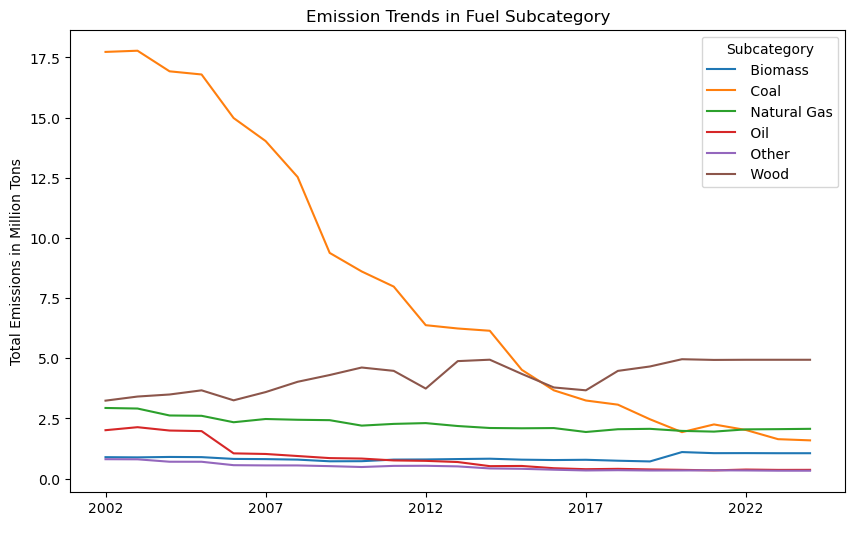

In [173]:
yearly_subcat_df = (
    fuel_df
    .groupby(['Year', 'Subcategory'])['Total_emissions_mlns']
    .sum()
    .reset_index(name='tot_emission')
)
yearly_subcat_pivot = yearly_subcat_df.pivot(index='Year', columns='Subcategory', values='tot_emission')
yearly_subcat_pivot.plot(figsize=(10,6))
plt.ylabel('Total Emissions in Million Tons')
plt.xlabel(' ')
plt.title('Emission Trends in Fuel Subcategory')
plt.show()

In [192]:
# Total emissions by pollutants
pollutants_total = (
    pollution_df
    .groupby('Pollutant')['Total_emissions_mlns']
    .sum()
    .reset_index(name='Total Emissions')
    .sort_values(by='Total Emissions', ascending=True)
)
pollutants_total.head(9)

,Pollutant,Total Emissions
0,Black Carbon,8.214341
4,Organic Carbon,34.954155
2,NH3,107.767197
6,PM2.5,120.027632
7,SO2,151.757781
3,NOX,320.795026
8,VOC,351.062547
5,PM10,389.273946
1,CO,1524.731711


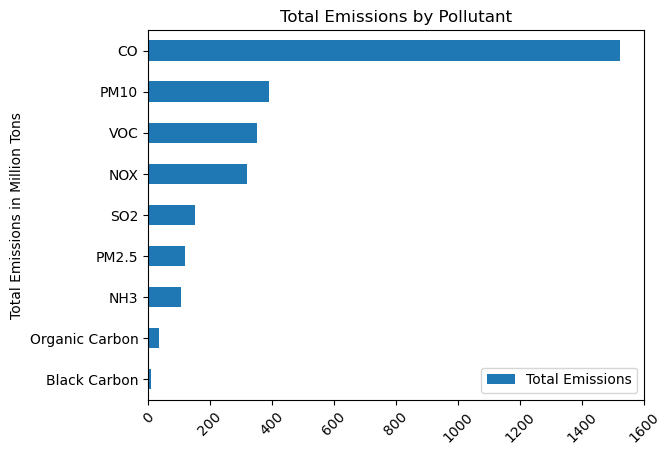

In [198]:
pollutants_total.plot(kind='barh', x='Pollutant', y='Total Emissions')
plt.xlabel(' ')
plt.ylabel('Total Emissions in Million Tons')
plt.title('Total Emissions by Pollutant')
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()

In [176]:
# Yearly total emissions by pollutant
yearly_emissions = (
    pollution_df
    .groupby(['Year', 'Pollutant'])['Total_emissions_mlns']
    .sum()
    .reset_index(name='tot_emissions')
)

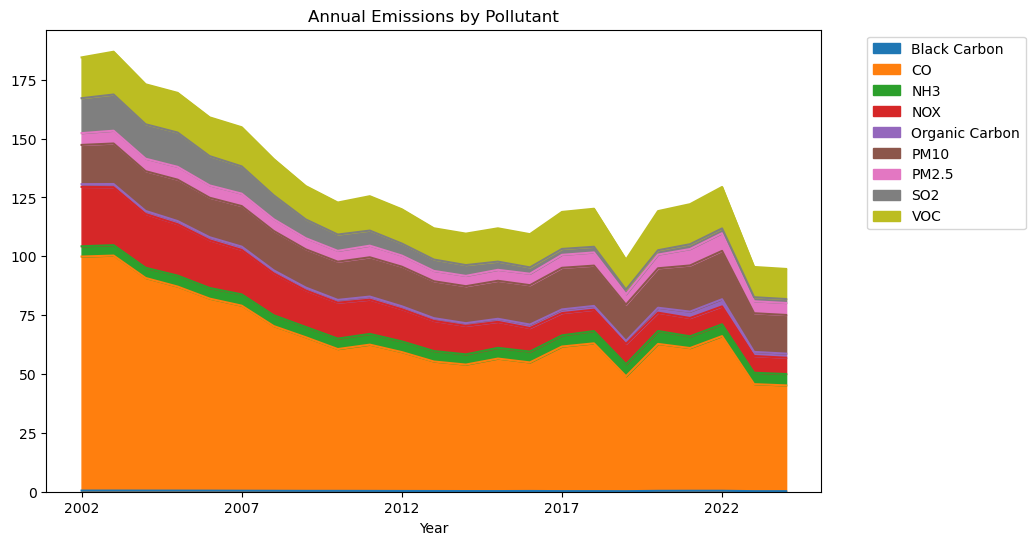

In [179]:
yearly_emissions_pivot = yearly_emissions.pivot(index='Year', columns='Pollutant', values='tot_emissions')
yearly_emissions_pivot.plot(kind='area', stacked=True, figsize=(10,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Annual Emissions by Pollutant')
plt.show()

In [114]:
# Filtering only major pollutants
filtered_pollutants = pollution_df.copy()
pollutants_selected = ['CO', 'PM10', 'PM2.5', 'SO2', 'NOX', 'VOC']
filtered_pollutants_df = filtered_pollutants[filtered_pollutants['Pollutant'].isin(pollutants_selected)]

In [115]:
# Total emission by filtered pollutants and sectors
pollutant_sector_df = (
    filtered_pollutants_df
    .groupby(['Sector', 'Pollutant'])['Total_emissions_mlns']
    .sum()
    .reset_index(name='tot_emissions')
    .sort_values(by='tot_emissions', ascending=False)
)
pollutant_sector_df.head()

,Sector,Pollutant,tot_emissions
48,Transportation,CO,973.845166
12,Fires,CO,364.628882
49,Transportation,NOX,195.912229
8,Dust,PM10,190.620037
28,Fuel Comb,SO2,125.034033


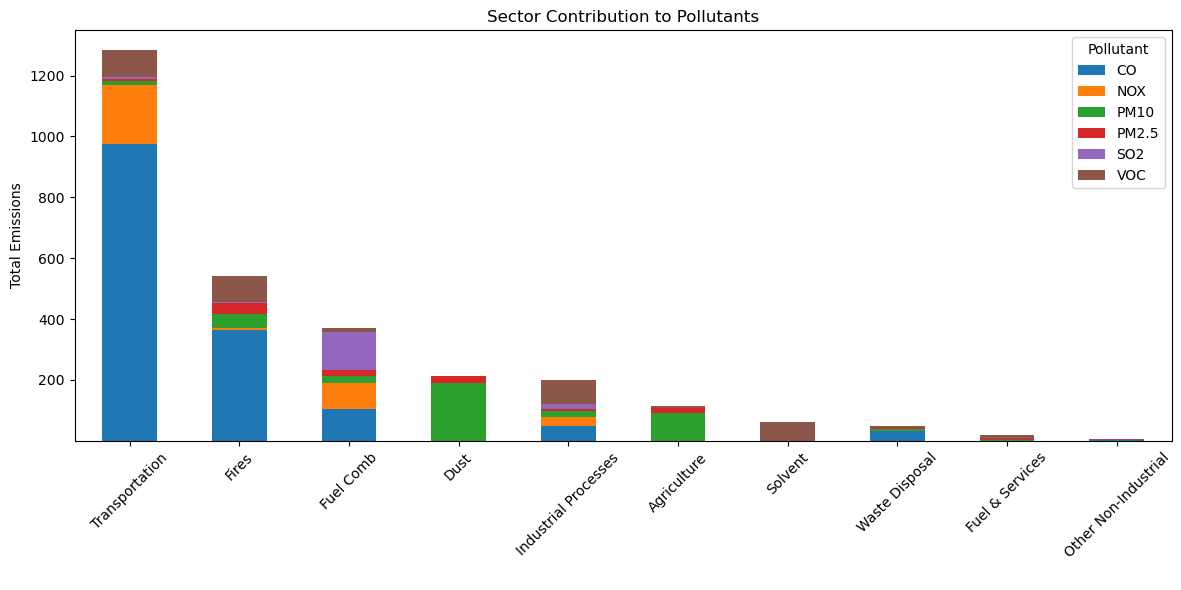

In [131]:
yearly_emissions_pivot = (
    pollutant_sector_df
    .pivot(index='Sector', columns='Pollutant', values='tot_emissions')
)

yearly_emissions_pivot['Total'] = yearly_emissions_pivot.sum(axis=1)
yearly_emissions_pivot= yearly_emissions_pivot.sort_values(by='Total', ascending=False)
yearly_emissions_pivot = yearly_emissions_pivot.drop(columns='Total')

# plot
yearly_emissions_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Sector Contribution to Pollutants')
plt.xlabel(' ')
plt.xticks(rotation=45)
plt.ylabel('Total Emissions')
plt.tight_layout()
plt.show()

In [117]:
filtered_pollutants_df.head()

,State,NAME,Pollutant,Sector,Category,Subcategory,INTPTLAT,INTPTLON,Year,Value,Total_emissions_mlns
55,AL,Alabama,CO,Fuel & Services,Gasoline Terminals,None,32.739579,-86.843447,2002,3.210200,0.000003
56,AL,Alabama,CO,Fuel & Services,Commercial Cooking,None,32.739579,-86.843447,2002,466.004323,0.000466
57,AL,Alabama,CO,Fires,Agricultural Field Burning,None,32.739579,-86.843447,2002,2571.941864,0.002572
58,AL,Alabama,CO,Fires,Prescribed Fires,None,32.739579,-86.843447,2002,571996.610000,0.571997
59,AL,Alabama,CO,Fires,Wildfires,None,32.739579,-86.843447,2002,28793.369000,0.028793


In [118]:
# Annual emissions for selected major pollutants
pollutants_by_year = (
    filtered_pollutants_df
    .groupby(['Year','Pollutant'])['Total_emissions_mlns']
    .sum()
    .reset_index(name='total_pollutants')
)
pollutants_by_year_pivot = pollutants_by_year.pivot(index='Year', columns='Pollutant', values='total_pollutants')
pollutants_by_year_pivot.head()

Pollutant,CO,NOX,PM10,PM2.5,SO2,VOC
Year,,,,,,
2002,99.413029,25.247122,16.668417,4.999307,14.845272,17.332469
2003,99.822408,24.603884,17.210610,5.437938,15.372721,18.173593
2004,90.312131,22.843845,16.892472,5.305312,14.629352,16.970232
2005,86.659361,21.851967,17.582398,5.454899,14.561049,16.856603
2006,81.564713,20.259489,16.780426,5.229968,12.440609,16.466478


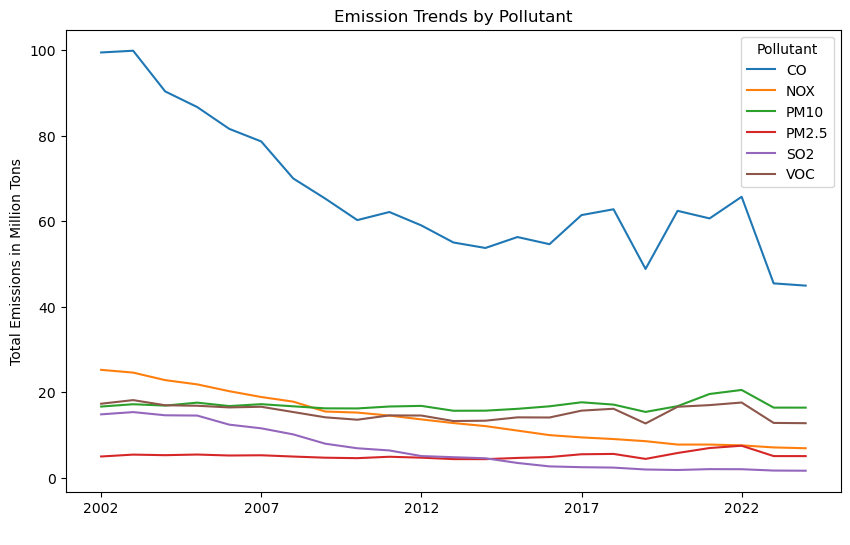

In [181]:
# Yearly emission trends for selected major pollutants
pollutants_by_year_pivot.plot(figsize=(10,6))
plt.ylabel('Total Emissions in Million Tons')
plt.xlabel(' ')
plt.title('Emission Trends by Pollutant')
plt.show()

In [182]:
pollutant_analysis_df = filtered_pollutants_df.copy()
pollutants_2002_2024_df = pollutant_analysis_df[pollutant_analysis_df['Year'].isin(['2002', '2024'])]
pollutants_year_comparision_df = (
    pollutants_2002_2024_df
    .groupby(['Pollutant', 'Year'])['Total_emissions_mlns']
    .sum()
    .reset_index(name='pollutant_value')
)

In [183]:
pollutants_year_pivot_df = pollutants_year_comparision_df.pivot(index='Pollutant', columns='Year', values='pollutant_value')
pollutants_year_pivot_df['% Change'] = (
    (pollutants_year_pivot_df['2024'] - pollutants_year_pivot_df['2002']) / pollutants_year_pivot_df['2002']) *100
pollutants_year_pivot_df

Year,2002,2024,% Change
Pollutant,,,
CO,99.413029,44.928820,-54.805904
NOX,25.247122,6.925158,-72.570505
PM10,16.668417,16.416823,-1.509409
PM2.5,4.999307,5.088202,1.778133
SO2,14.845272,1.673157,-88.729361
VOC,17.332469,12.780310,-26.263767


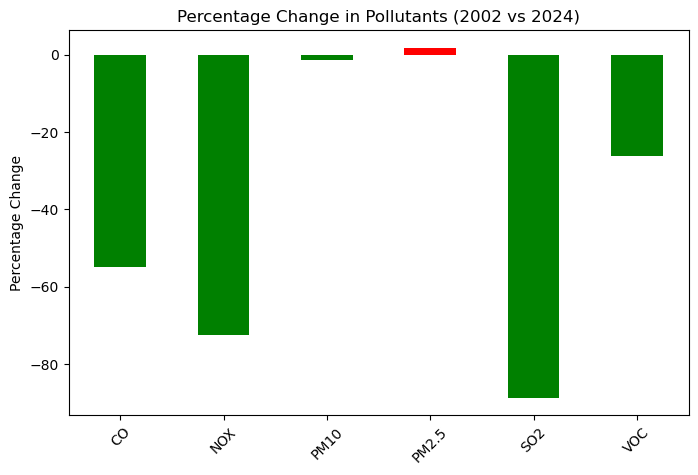

In [215]:
colors= np.where(pollutants_year_pivot_df['% Change']< 0, 'green', 'red')
pollutants_year_pivot_df['% Change'].plot(kind='bar',color=colors, figsize=(8,5))
plt.xlabel('')
plt.ylabel('Percentage Change')
plt.title('Percentage Change in Pollutants (2002 vs 2024)')
plt.xticks(rotation=45)
plt.show()

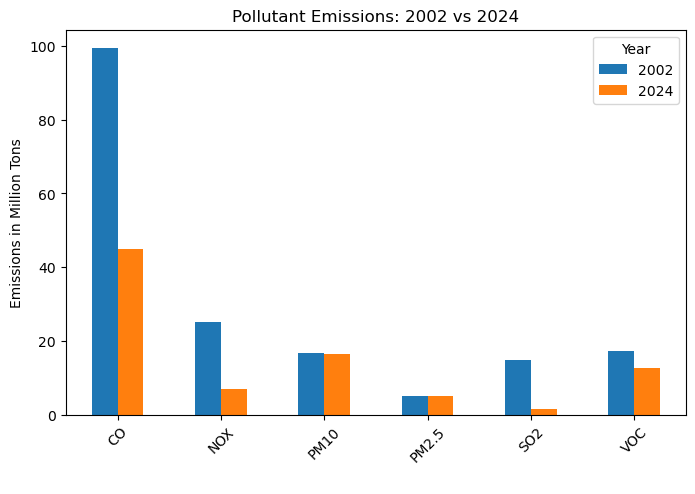

In [185]:
pollutants_year_pivot_df[['2002','2024']].plot(kind='bar', figsize=(8,5))

plt.title('Pollutant Emissions: 2002 vs 2024')
plt.ylabel('Emissions in Million Tons')
plt.xlabel(' ')
plt.xticks(rotation=45)
plt.show()

In [123]:
# Top stated with highest CO emissions
top_states = filtered_pollutants_df[filtered_pollutants_df['Pollutant'] == 'CO']
grouped_by_states = (
    top_states
    .groupby('NAME')['Total_emissions_mlns']
    .sum()
    .reset_index(name='total_value')
    .sort_values(by='total_value', ascending=False)
    .head()
)
grouped_by_states

,NAME,total_value
44,Texas,103.156641
4,California,97.805546
9,Florida,93.963290
10,Georgia,60.969898
37,Oregon,53.717343


In [124]:
f = pollution_df.groupby('State')['Total_emissions_mlns'].sum().reset_index(name='val').sort_values(by='val', ascending=False)
f.head()

,State,val
44,TX,242.324255
4,CA,177.565464
9,FL,151.066718
10,GA,104.282987
24,MO,95.596121


In [125]:
CO_by_sector = (
    filtered_pollutants_df
    .groupby('Sector')['Total_emissions_mlns']
    .sum().reset_index(name='total_CO_emissions')
    .sort_values(by='total_CO_emissions', ascending=False)
)
CO_by_sector

,Sector,total_CO_emissions
8,Transportation,1284.310560
2,Fires,542.819809
4,Fuel Comb,371.511369
1,Dust,213.046049
5,Industrial Processes,198.413867
0,Agriculture,113.510313
7,Solvent,62.718422
9,Waste Disposal,47.171929
3,Fuel & Services,17.841975
6,Other Non-Industrial,6.304349


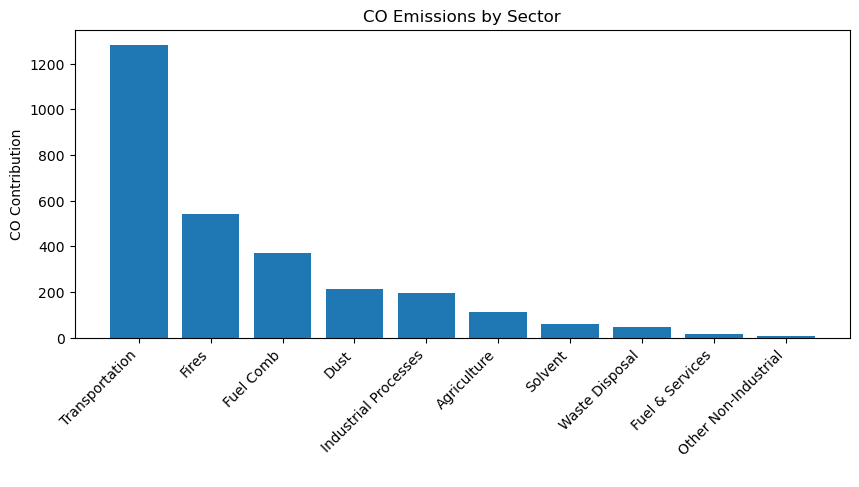

In [188]:
plt.figure(figsize=(10,4))

plt.bar(CO_by_sector['Sector'], CO_by_sector['total_CO_emissions'])
plt.xticks(rotation=45, ha='right')
plt.xlabel(' ')
plt.ylabel('CO Contribution')
plt.title('CO Emissions by Sector')
plt.show()